In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return (x-3)*(x-5)*(x-7)+85

x = np.linspace(0, 10, 200)
y = f(x)

In [3]:
a, b = 1, 8 # the left and right boundaries
N = 5 # the number of points
xint = np.linspace(a, b, N)
yint = f(xint)

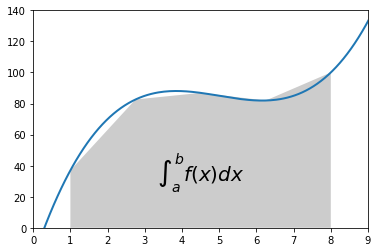

In [4]:
plt.plot(x, y, lw=2)
plt.axis([0, 9, 0, 140])
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)
plt.text(0.5 * (a + b), 30,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20);

# SymPy: Open Source Symbolic Mathematics

This notebook uses the SymPy package to perform symbolic manipulations, and combined with numpy and matplotlib, also displays numerical visualizations of symbolically constructed expressions.

We first load sympy printing extensions, as well as all of sympy:

In [5]:
from IPython.display import display
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

#from __future__ import division
import sympy as sym
from sympy import *

In [6]:
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')

## Elementary operations

In [7]:
Rational(3,2)*pi + exp(I*x) / (x**2 + y)

        ⅈ⋅x 
3⋅π    ℯ    
─── + ──────
 2     2    
      x  + y

In [8]:
exp(I*x).subs(x,pi).evalf()

-1.00000000000000

In [9]:
e = x + 2*y

In [10]:
srepr(e)

"Add(Symbol('x'), Mul(Integer(2), Symbol('y')))"

In [11]:
exp(pi * sqrt(163)).evalf(50)

262537412640768743.99999999999925007259719818568888

## Algebra

In [12]:
eq = ((x+y)**2 * (x+1))
eq

               2
(x + 1)⋅(x + y) 

In [13]:
expand(eq)

 3      2      2      2            2
x  + 2⋅x ⋅y + x  + x⋅y  + 2⋅x⋅y + y 

In [14]:
a = 1/x + (x*sin(x) - 1)/x
a

x⋅sin(x) - 1   1
──────────── + ─
     x         x

In [15]:
simplify(a)

sin(x)

In [16]:
eq = Eq(x**3 + 2*x**2 + 4*x + 8, 0)
eq

 3      2              
x  + 2⋅x  + 4⋅x + 8 = 0

In [17]:
solve(eq, x)

[-2, -2⋅ⅈ, 2⋅ⅈ]

In [18]:
a, b = symbols('a b')
Sum(6*n**2 + 2**n, (n, a, b))

  b              
 ___             
 ╲               
  ╲   ⎛ n      2⎞
  ╱   ⎝2  + 6⋅n ⎠
 ╱               
 ‾‾‾             
n = a            

## Calculus

In [19]:
limit((sin(x)-x)/x**3, x, 0)

-1/6

In [20]:
(1/cos(x)).series(x, 0, 6)

     2      4        
    x    5⋅x     ⎛ 6⎞
1 + ── + ──── + O⎝x ⎠
    2     24         

In [21]:
diff(cos(x**2)**2 / (1+x), x)

         ⎛ 2⎞    ⎛ 2⎞      2⎛ 2⎞
  4⋅x⋅sin⎝x ⎠⋅cos⎝x ⎠   cos ⎝x ⎠
- ─────────────────── - ────────
         x + 1                 2
                        (x + 1) 

In [22]:
integrate(x**2 * cos(x), (x, 0, pi/2))

      2
     π 
-2 + ──
     4 

In [23]:
eqn = Eq(Derivative(f(x),x,x) + 9*f(x), 1)
display(eqn)
dsolve(eqn, f(x))

           2          
          d           
9⋅f(x) + ───(f(x)) = 1
           2          
         dx           

f(x) = C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x) + 1/9

## Illustrating Taylor series
We will define a function to compute the Taylor series expansions of a symbolically defined expression at various orders and visualize all the approximations together with the original function

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    plt.legend(loc='best').get_frame().set_alpha(0.8)

With this function defined, we can now use it for any sympy function or expression



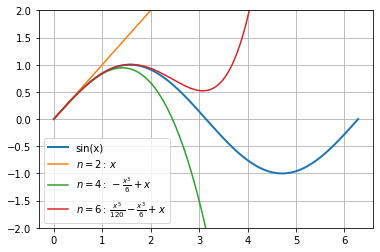

In [26]:
plot_taylor_approximations(sin, 0, [2, 4, 6], (0, 2*pi), (-2,2))


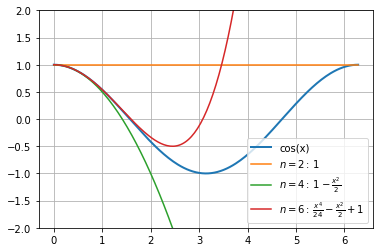

In [27]:
plot_taylor_approximations(cos, 0, [2, 4, 6], (0, 2*pi), (-2,2))


This shows easily how a Taylor series is useless beyond its convergence radius, illustrated by a simple function that has singularities on the real axis:



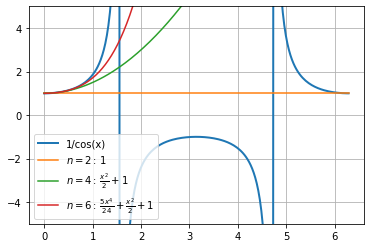

In [28]:
# For an expression made from elementary functions, we must first make it into
# a callable function, the simplest way is to use the Python lambda construct.
plot_taylor_approximations(lambda x: 1/cos(x), 0, [2,4,6], (0, 2*pi), (-5,5))